In [27]:
##Importing all the headers needed
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def read_filename(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

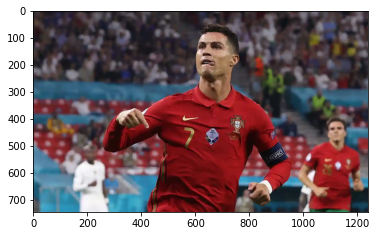

In [29]:
filename = "3500.jpg"
img = read_filename(filename)

org_img = np.copy(img)


#Create Edge Mask

In [30]:
#Create Edge Mask
def edge_mask(img, line_size,blur_value):
    #Inputting gray image | outut is edges
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY, line_size, blur_value)
    return edges

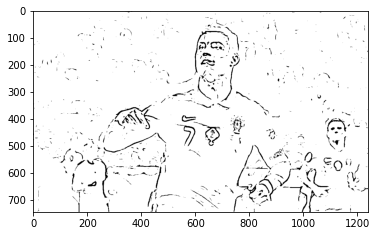

In [31]:
line_size, blur_value = 9,7
edges = edge_mask(img, line_size,blur_value)
plt.imshow(edges , cmap = "gray")
plt.show()

#Reduce Color Palette

In [32]:
def color_quantization(img, k):
    #Tranform the image with
    data = np.float32(img).reshape((-1,3))
    #Determine Criteria
    criteria = (cv2.TermCriteria_EPS+ cv2.TermCriteria_MAX_ITER, 20, 0.001)
    #implementing K-means
    ret, label, center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

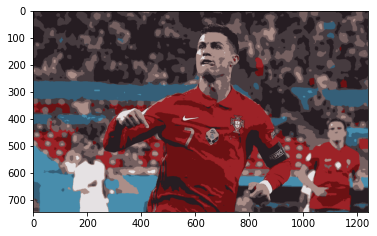

In [33]:
img = color_quantization(img, k=9)
plt.imshow(img)
plt.show()

#Reducing the Noise in the Image

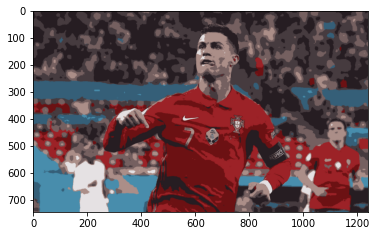

In [34]:
##Reducing Noise further
blurred = cv2.bilateralFilter(img, d = 3, sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

#Combining the Edge Mask and Quantized Image

In [35]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask=edges)
    plt.imshow(c)
    plt.title("Cartoon Image")
    plt.show()
    plt.imshow(org_img)
    plt.show("Original Image")
    plt.show()

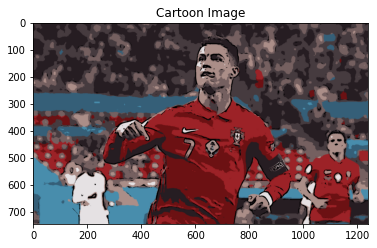

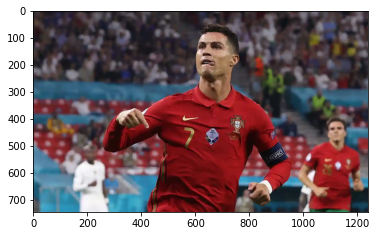

In [36]:
cartoon()